# Step 1:  Data Analysis : Import Libraries

In [1547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Step 2:  Data Analysis : Importing and Understanding Data

In [1548]:
# Read the Data, 
BikeRental = pd.read_csv('day.csv')
BikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1549]:
# as cnt is target column, bring this column to first posistion for better readability 
column_to_move = BikeRental.pop("cnt")
BikeRental.insert(1, "cnt", column_to_move)
BikeRental.head()

,instant,cnt,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,985,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,2,801,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,3,1349,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,4,1562,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,5,1600,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [1550]:
#check the shape
BikeRental.shape

(730, 16)

In [1551]:
# Check Null data
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   cnt         730 non-null    int64  
 2   dteday      730 non-null    object 
 3   season      730 non-null    int64  
 4   yr          730 non-null    int64  
 5   mnth        730 non-null    int64  
 6   holiday     730 non-null    int64  
 7   weekday     730 non-null    int64  
 8   workingday  730 non-null    int64  
 9   weathersit  730 non-null    int64  
 10  temp        730 non-null    float64
 11  atemp       730 non-null    float64
 12  hum         730 non-null    float64
 13  windspeed   730 non-null    float64
 14  casual      730 non-null    int64  
 15  registered  730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1552]:
BikeRental.describe() # Check details of numeric variables

,instant,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,4508.006849,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534
std,210.877136,1936.011647,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728
min,1.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000
25%,183.250000,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000
50%,365.500000,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000
75%,547.750000,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000
max,730.000000,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000


In [1553]:
# Check size
BikeRental.size

11680

In [1554]:
# Check datatypes
BikeRental.dtypes

instant         int64
cnt             int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [1555]:
#check the values of data
BikeRental.values

array([[1, 985, '01-01-2018', ..., 10.749882, 331, 654],
       [2, 801, '02-01-2018', ..., 16.652113, 131, 670],
       [3, 1349, '03-01-2018', ..., 16.636703, 120, 1229],
       ...,
       [728, 1341, '29-12-2019', ..., 8.333661, 159, 1182],
       [729, 1796, '30-12-2019', ..., 23.500518, 364, 1432],
       [730, 2729, '31-12-2019', ..., 10.374682, 439, 2290]], dtype=object)

In [1556]:
#check the dimensions of data
BikeRental.ndim

2

In [1557]:
# Basic details are checked and there are no null values , size is 730.16

# Step 3: Clean up of  Data

In [1558]:
# dteday ->  date is not useful here as we already have month and year so lets how many days BikeRental is running
BikeRental['Duration'] = (pd.to_datetime(BikeRental['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [1559]:
BikeRental.head()

,instant,cnt,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Duration
0,1,985,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,0
1,2,801,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,1
2,3,1349,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,2
3,4,1562,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,3
4,5,1600,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,4


In [1560]:
# Check about data shape including duration
BikeRental.shape

(730, 17)

In [1561]:
# Check if there are any missing values
BikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   cnt         730 non-null    int64  
 2   dteday      730 non-null    object 
 3   season      730 non-null    int64  
 4   yr          730 non-null    int64  
 5   mnth        730 non-null    int64  
 6   holiday     730 non-null    int64  
 7   weekday     730 non-null    int64  
 8   workingday  730 non-null    int64  
 9   weathersit  730 non-null    int64  
 10  temp        730 non-null    float64
 11  atemp       730 non-null    float64
 12  hum         730 non-null    float64
 13  windspeed   730 non-null    float64
 14  casual      730 non-null    int64  
 15  registered  730 non-null    int64  
 16  Duration    730 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.1+ KB


In [1562]:
BikeRental.describe()

,instant,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Duration
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,4508.006849,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,364.500000
std,210.877136,1936.011647,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,210.877136
min,1.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,0.000000
25%,183.250000,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,182.250000
50%,365.500000,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,364.500000
75%,547.750000,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,546.750000
max,730.000000,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,729.000000


In [1563]:
#check the columns of data
BikeRental.columns

Index(['instant', 'cnt', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'Duration'],
      dtype='object')

In [1564]:
#check the size of data
BikeRental.size

12410

In [1565]:
# Lets drop Dateday column, because there is already a seperate column is available for month and year,
# we already have duration calculated
BikeRental.drop(['dteday'], inplace = True,axis=1)


In [1566]:
BikeRental.drop(['instant'], inplace = True,axis=1) # There is no significance of this variable hence drop it, as this is just 
# row identifier and will have increasing number for every row and higher number can be given more weightage however its of no use

In [1567]:
# Find the correlation between columns
corel = BikeRental.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Duration
cnt,1.000000,0.404584,0.569728,0.278191,-0.068764,0.067534,0.062542,-0.295929,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,0.629896
season,0.404584,1.000000,-0.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.413587
yr,0.569728,-0.000000,1.000000,-0.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.866026
mnth,0.278191,0.831032,-0.000000,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.498251
holiday,-0.068764,-0.010868,0.008195,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,0.016275
weekday,0.067534,-0.003081,-0.005466,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,-0.000023
workingday,0.062542,0.013762,-0.002945,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,-0.004619
weathersit,-0.295929,0.021306,-0.050322,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.021862
temp,0.627044,0.333361,0.048789,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.150738
atemp,0.630685,0.342014,0.047215,0.226430,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.152773


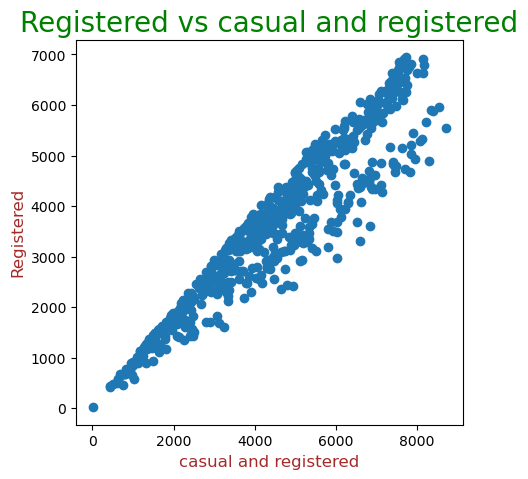

In [1568]:
# Looking at above data we can see strong correl between cnt and registered, lets try 
# with scatter plot for these 2 variables
plt.figure(figsize = [5,5])
plt.scatter(data = BikeRental , x = 'cnt', y = 'registered')

# Adding and formatting title
plt.title("Registered vs casual and registered", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("casual and registered", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Registered", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [1569]:
# As we see there is strong correlation between cnt and registered and cnt is target variable so we will drop registered
# Also cnt = casual + registered hence  registered is also not needed
BikeRental.drop('registered', inplace = True,axis=1)

In [1570]:
# As we see there is strong correlation between cnt and casual and cnt is target variable so we will drop registered, 
# Also cnt = casual + registered hence casual is also not needed
BikeRental.drop('casual', inplace = True,axis=1)

In [1571]:
# Find the correlation between columns
corel = BikeRental.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Duration
cnt,1.000000,0.404584,0.569728,0.278191,-0.068764,0.067534,0.062542,-0.295929,0.627044,0.630685,-0.098543,-0.235132,0.629896
season,0.404584,1.000000,-0.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.413587
yr,0.569728,-0.000000,1.000000,-0.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.866026
mnth,0.278191,0.831032,-0.000000,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.498251
holiday,-0.068764,-0.010868,0.008195,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.016275
weekday,0.067534,-0.003081,-0.005466,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,-0.000023
workingday,0.062542,0.013762,-0.002945,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.004619
weathersit,-0.295929,0.021306,-0.050322,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.021862
temp,0.627044,0.333361,0.048789,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.150738
atemp,0.630685,0.342014,0.047215,0.226430,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.152773


In [1572]:
# Analyse data summary
BikeRental.describe()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Duration
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,364.500000
std,1936.011647,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,210.877136
min,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.000000
25%,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,182.250000
50%,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,364.500000
75%,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,546.750000
max,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,729.000000


In [1573]:
## Check if there are missing values
BikeRental.isnull().sum()

cnt           0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
Duration      0
dtype: int64

In [1574]:
# Inference: There are no null values.

In [1575]:
# Handle Outliers
BikeRental.nunique()

cnt           695
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
Duration      730
dtype: int64

## Step 3 :  Visualize the data EDA

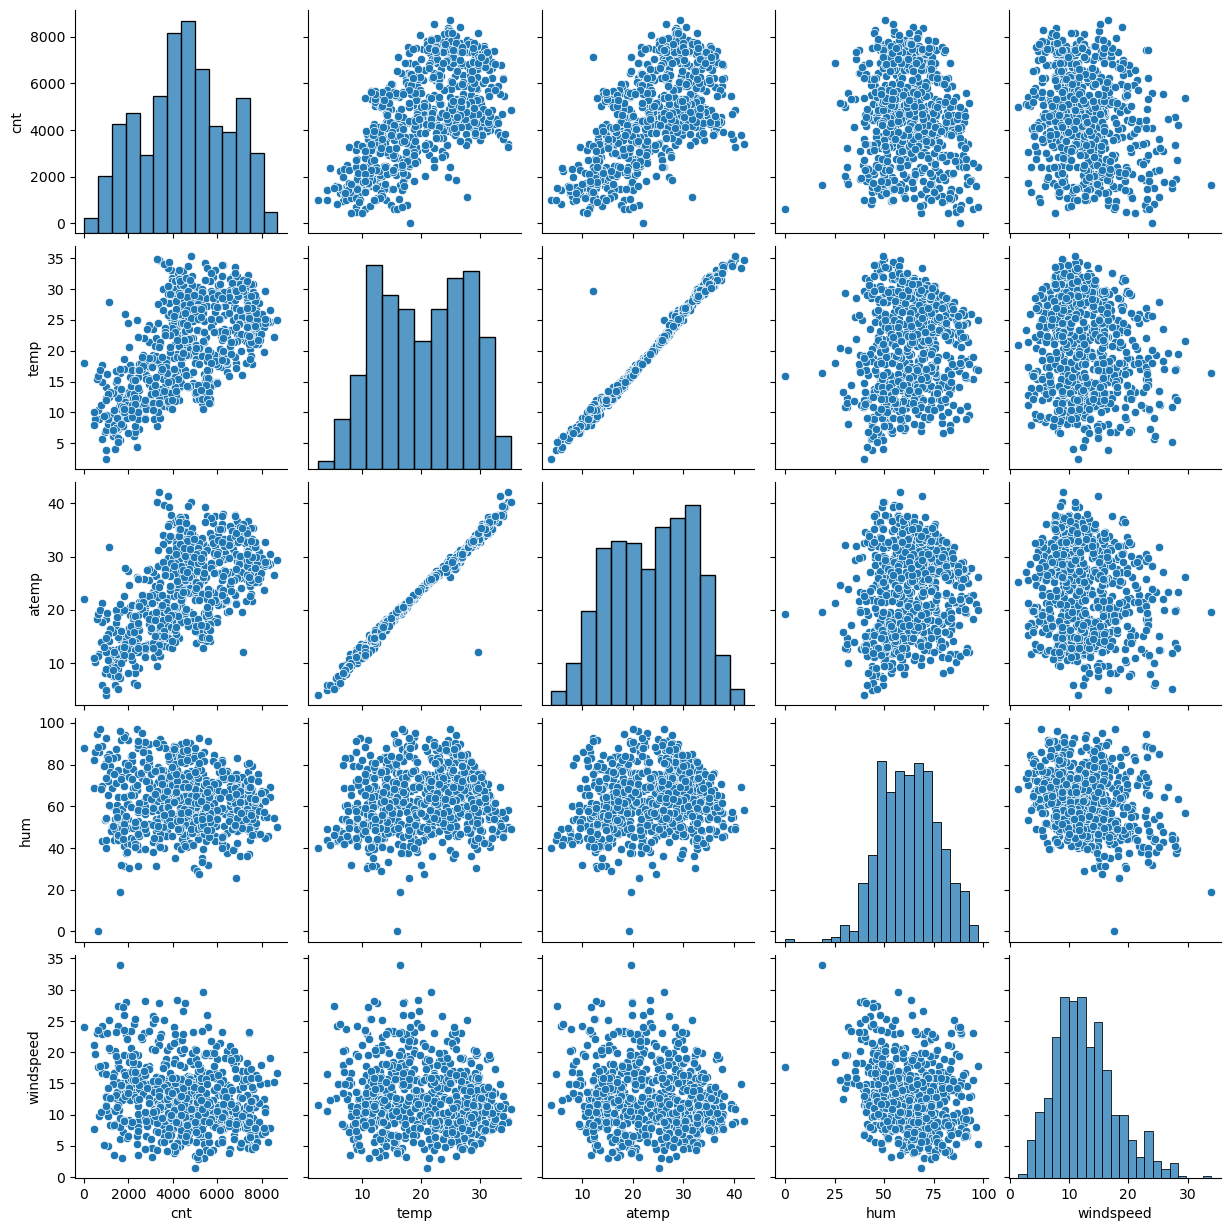

In [1576]:
# Lets analyse all continuous numeric variables using seaborn
#sns.pairplot(BikeRental)

sns.pairplot(data=BikeRental,vars=['cnt','temp', 'atemp', 'hum','windspeed'])
plt.show()

In [1577]:
# temp and atemp has higher correlation with eachother and cnt

<Figure size 2000x1500 with 0 Axes>

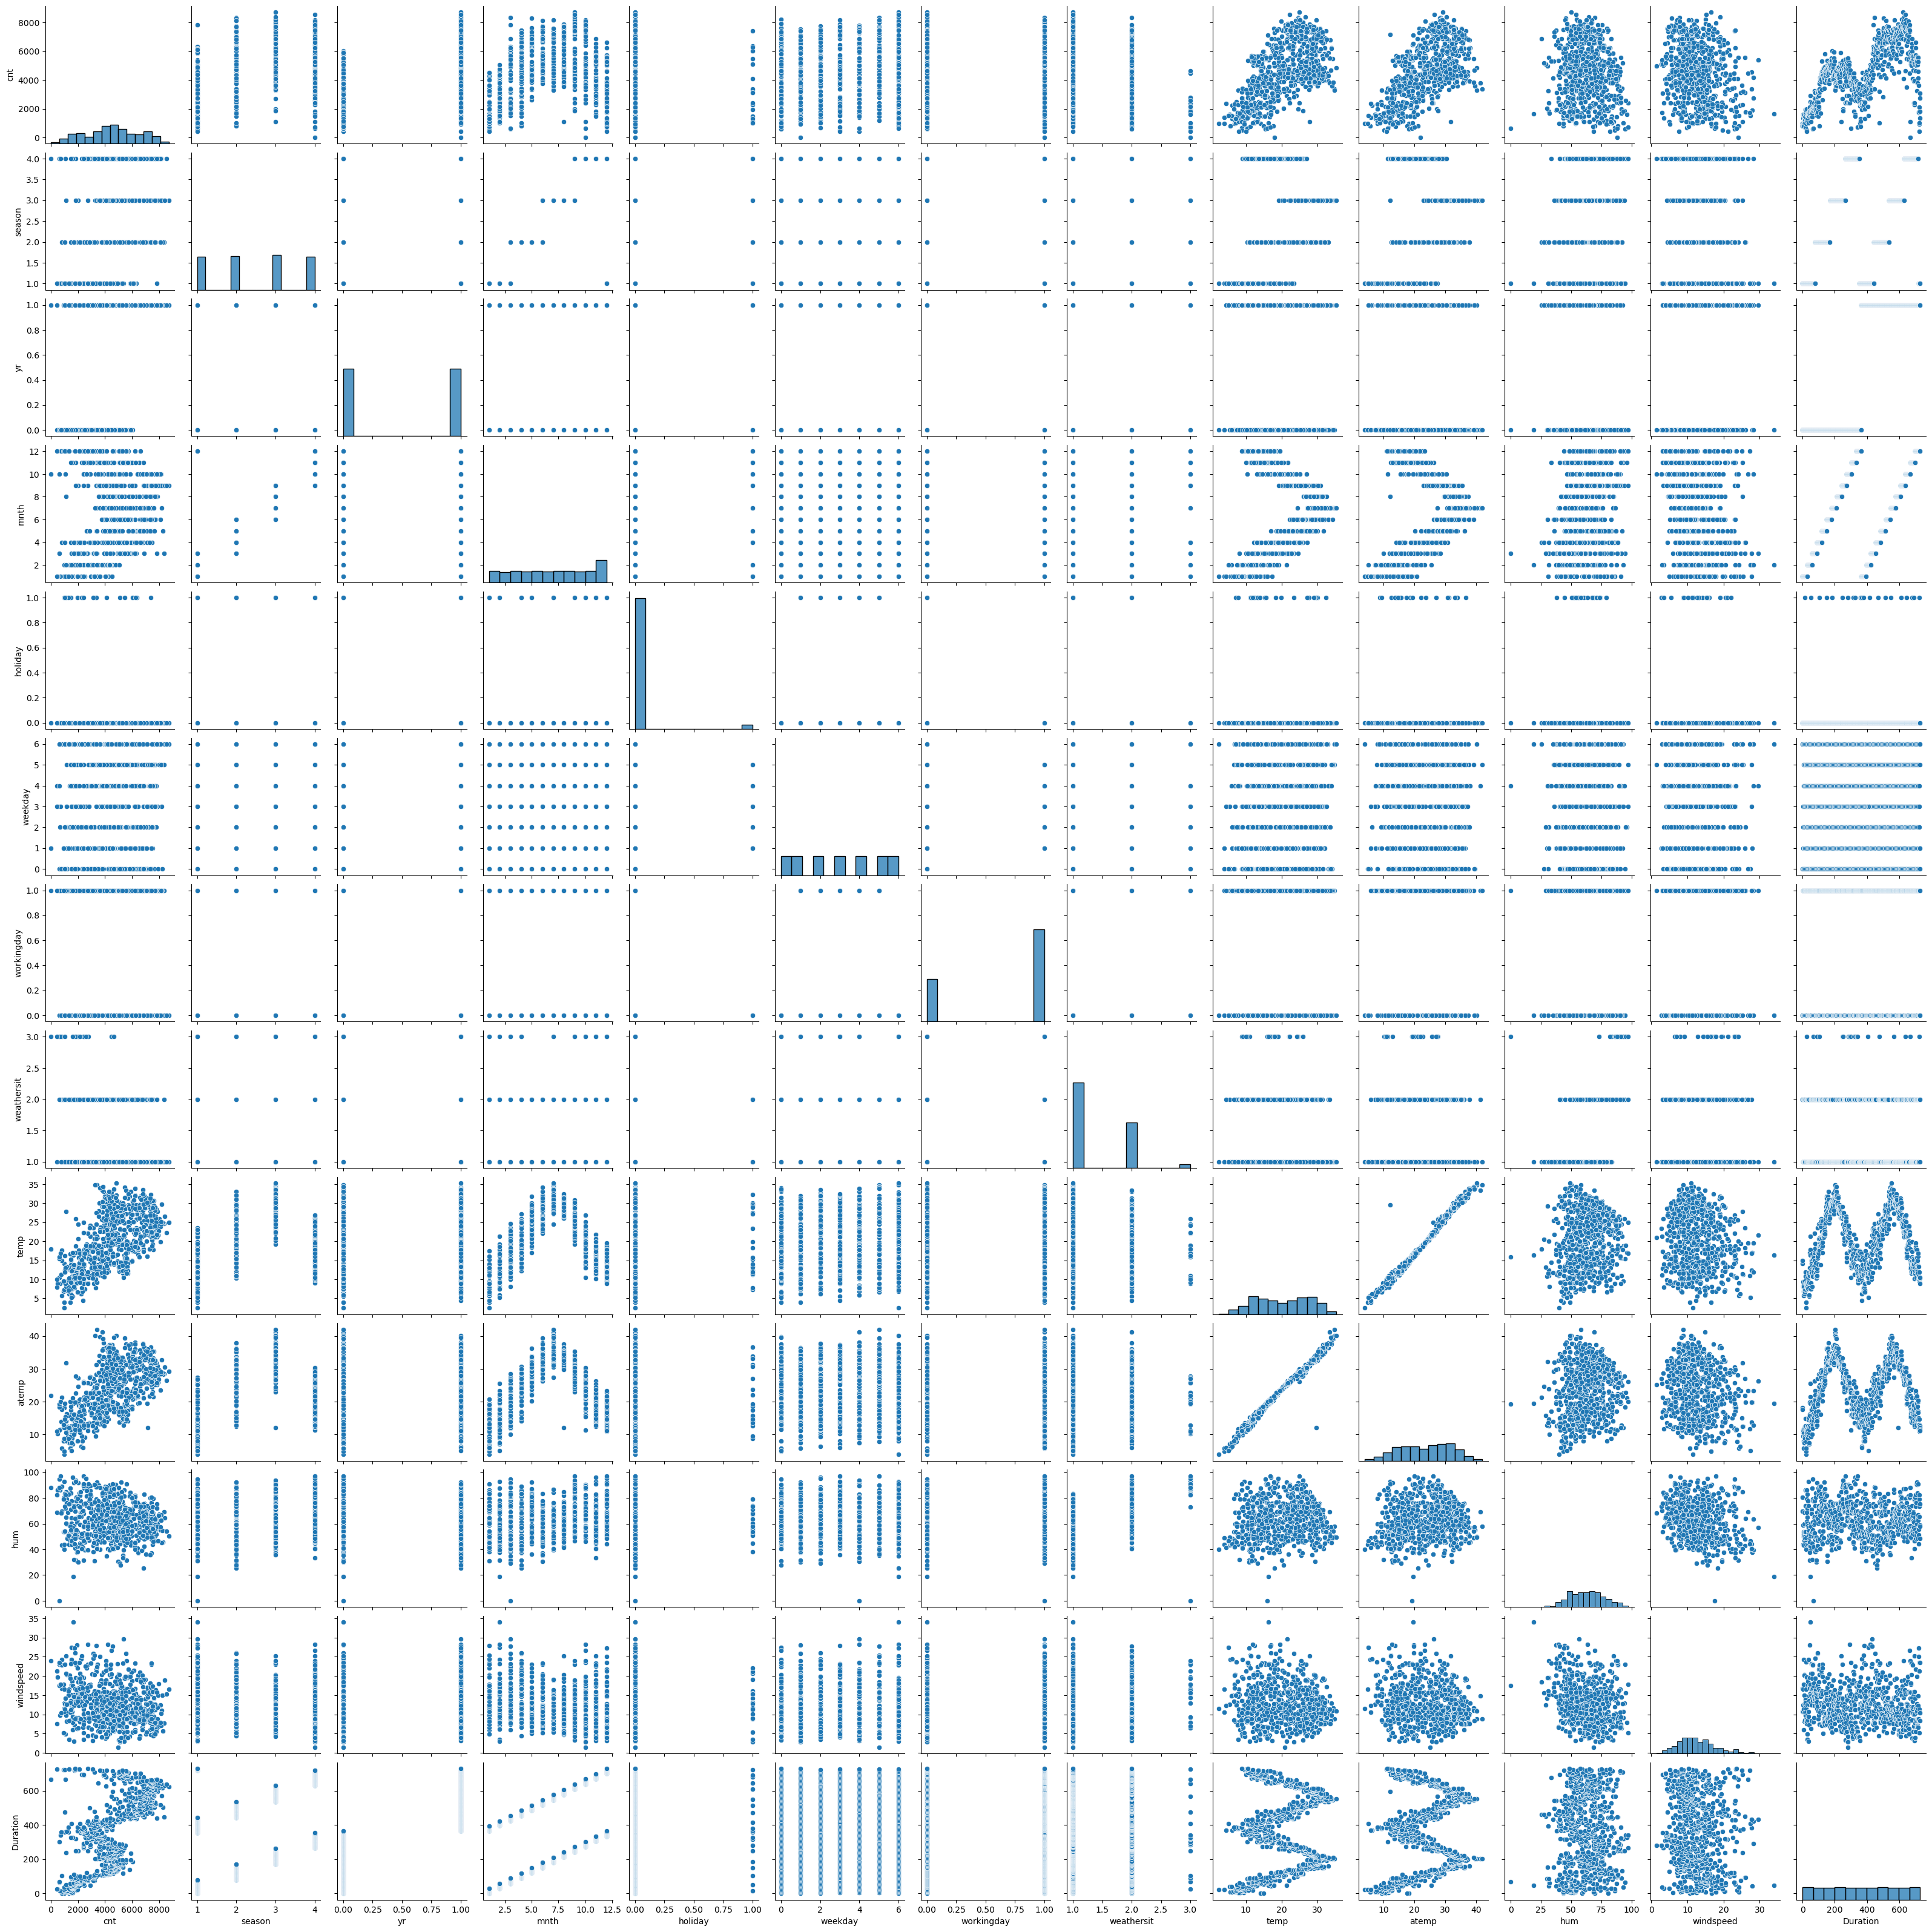

In [1578]:
# Visualising the Data to Find the Correlation between the all Numerical Variable
plt.figure(figsize=(20,15))
sns.pairplot(BikeRental)
plt.show()

# Looking at above plot conlcusion is , we should consider linear regression because there are some numerical 
# variables here which looks with Positive correlation with "cnt"

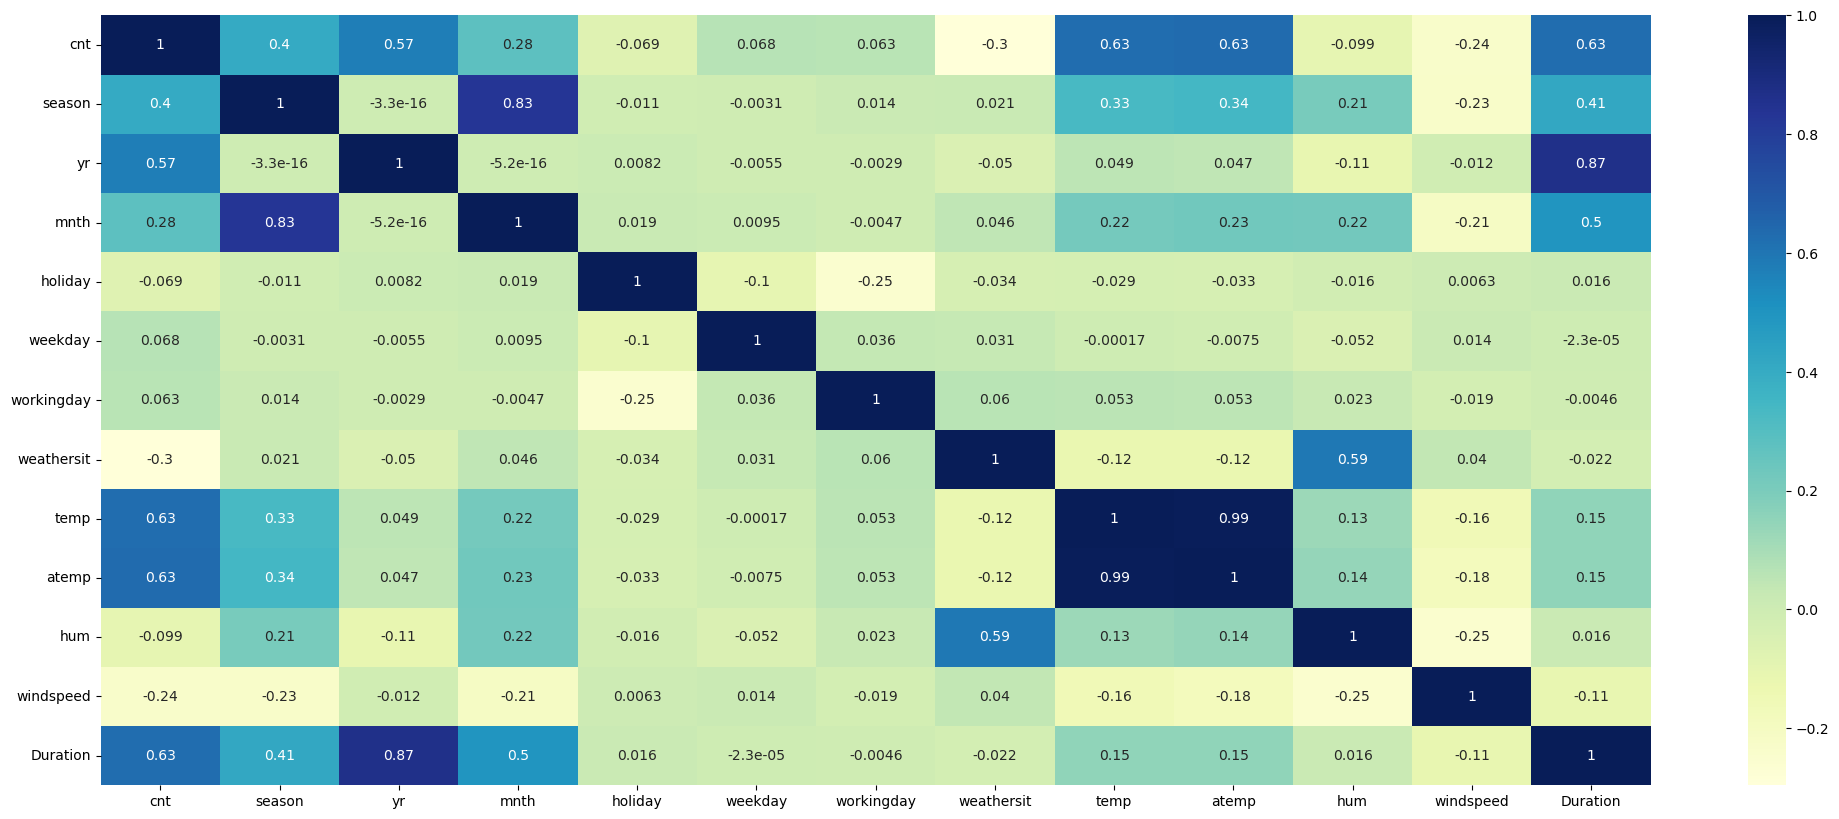

In [1579]:
# Lets draw Heatmap of correlation between variables

#Calculate Correlation
corr_BikeRent = BikeRental.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr_BikeRent,annot=True, cmap='YlGnBu' )
plt.show()

In [1580]:
# From the correlation map, temp, atemp and duration -> more then 0.60 seems to be highly correlated .
# However let us elminate it based on the Variance Inflation Factor later during the model
# building.We also see Target variable has a linear relationship with some of the indeptendent variables.
# Good sign for building a linear regression Model.

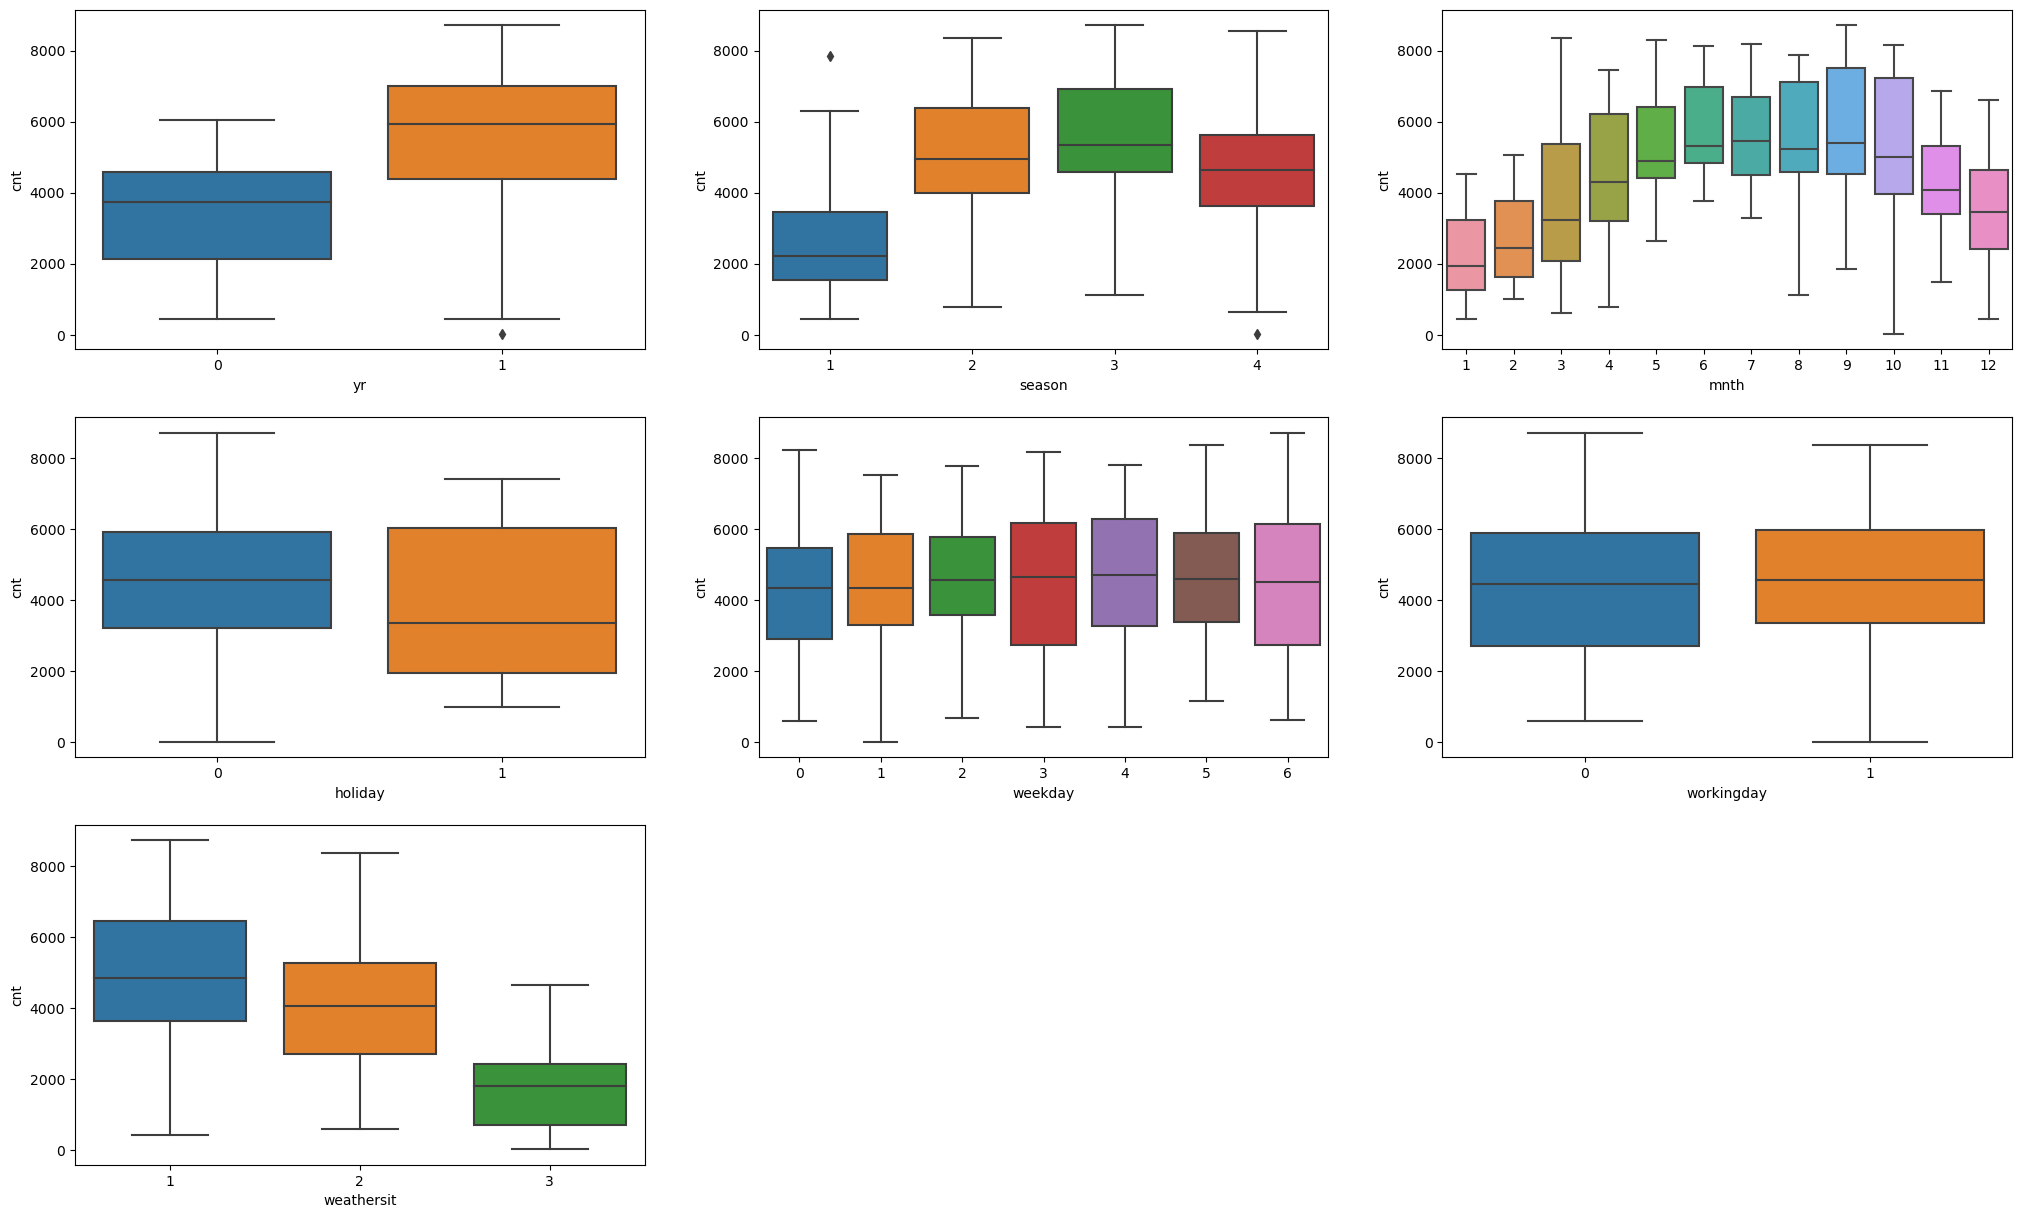

In [1581]:
# lets analyse data for all categorical variables vs Target Variable i.e. cnt
plt.figure(figsize=(25,15) )
plt.subplot(3,3,1)
sns.boxplot(x='yr' , y='cnt' , data=BikeRental)
plt.subplot(3,3,2)
sns.boxplot(x='season' , y='cnt' , data=BikeRental)
plt.subplot(3,3,3)
sns.boxplot(x='mnth' , y='cnt' , data=BikeRental)
plt.subplot(3,3,4)
sns.boxplot(x='holiday' , y='cnt' , data=BikeRental)
plt.subplot(3,3,5)
sns.boxplot(x='weekday' , y='cnt' , data=BikeRental)
plt.subplot(3,3,6)
sns.boxplot(x='workingday' , y='cnt' , data=BikeRental)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit' , y='cnt' , data=BikeRental)
plt.show()

In [1582]:
# Conclusion:
#1. Referred for US calendar"https://www.calendarr.com/united-states/seasons-of-the-year-in-the-united-states/" for season vs month
# Now here if we see during Summer/Fall season there is considerably more distribution and median of data
# Next year data has more demand
# we can now check months for those seasons from reference website and move to next plot which is on the basis of months,
# so here data matches and we can see there is more Bike rentals taken during months of those seasons and hence months June - October are mostly
# months in which demand is higher, we can see there is high demand with year i.e. 2019
# Demand is increasing each month till June. September month has highest demand.
# After September, demand is decreasing due to extreme weather condition
# Holiday has less demand
# We can See for non holiday there is higher value in median even though distribution of data is less
# Weekday there is equal demand , however not much difference in working or non working day,no clear picture
# On weathersit we can see there is more demand on clear weather
# No Outliers to be handled

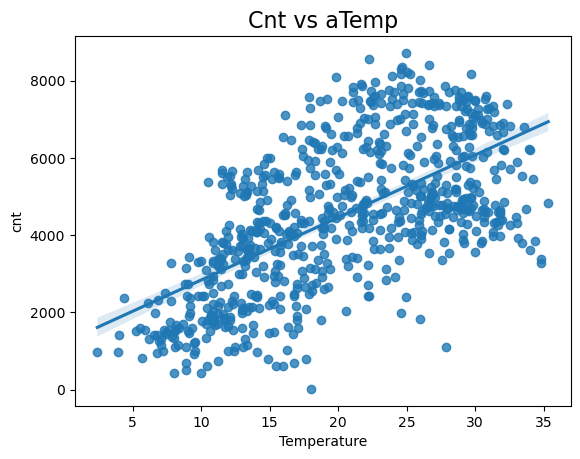

In [1583]:
plt.title("Cnt vs aTemp",fontsize=16)
sns.regplot(data=BikeRental,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

In [1584]:
# Demand for bikes is positively correlated to temp,We can see that cnt is linearly increasing with temp
# indicating linear relation.

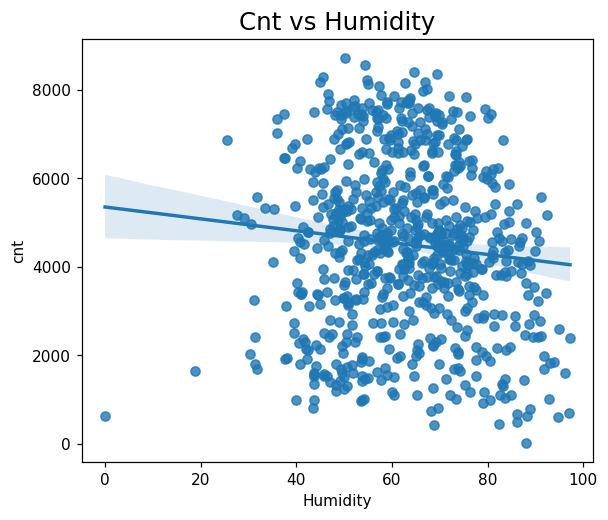

In [1585]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=16)
sns.regplot(data=BikeRental,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

In [1586]:
# Plot is scattered, however we can see Bike rental demand is decreasing with increasing humidity

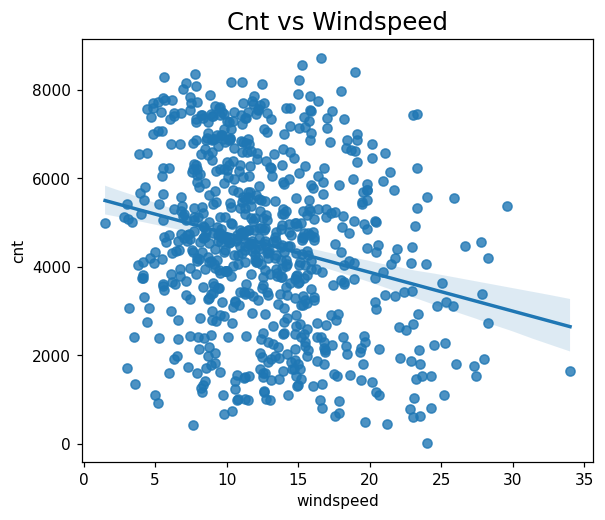

In [1587]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=BikeRental,y="cnt",x="windspeed")
plt.show()

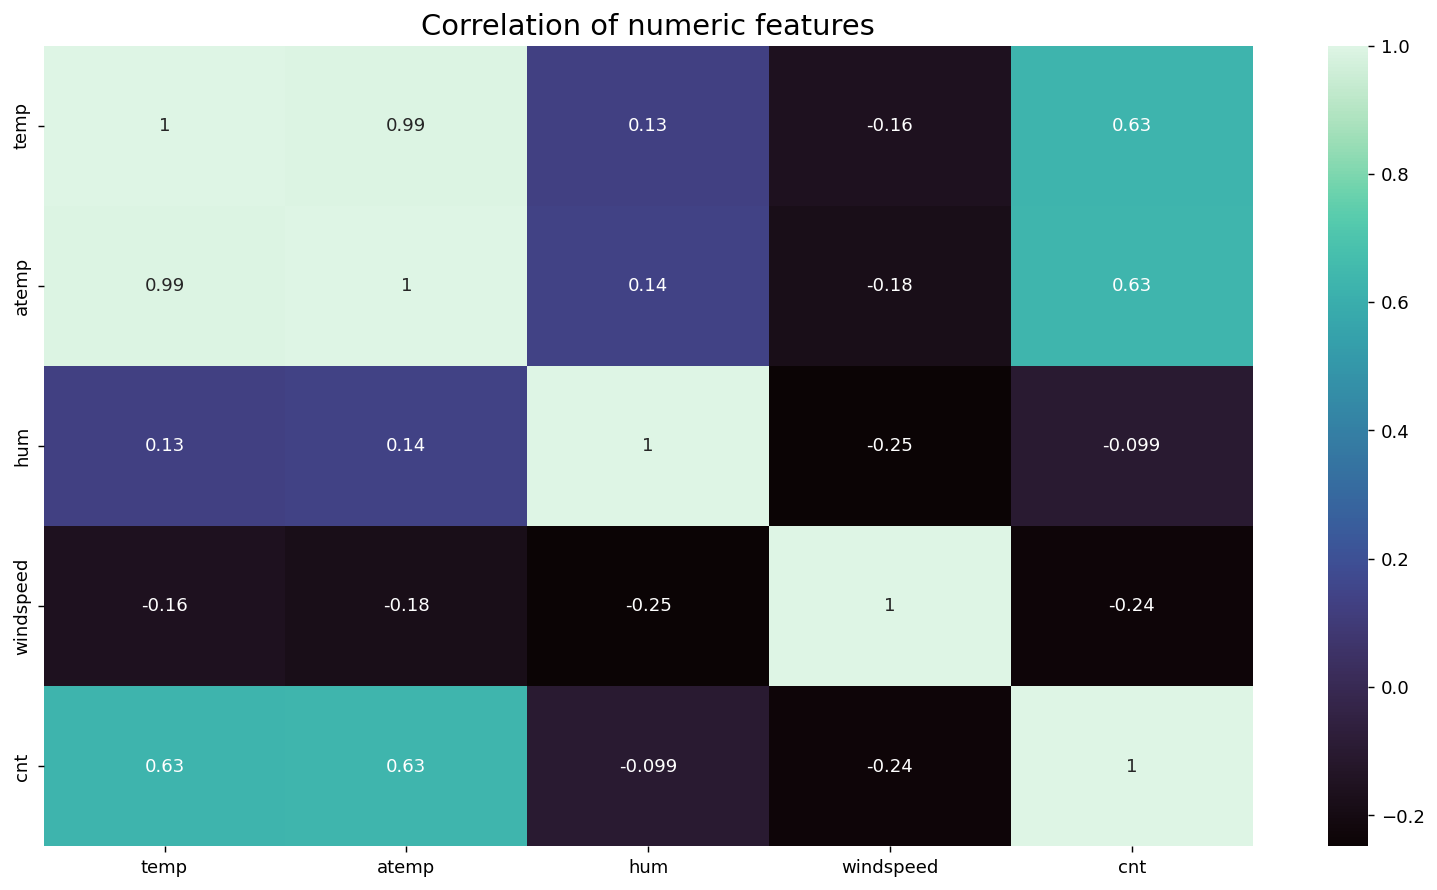

In [1588]:
num_bikerent = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(BikeRental[num_bikerent].corr(),annot= True,cmap="mako")
plt.show()

In [1589]:
# High Correlation in temp and atemp but for now its not making much difference so we will proceed
BikeRental.describe()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Duration
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,364.500000
std,1936.011647,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,210.877136
min,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.000000
25%,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,182.250000
50%,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,364.500000
75%,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,546.750000
max,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,729.000000


# Step 4:  Data Preparation for modeling
- Encoding :
    - Catagorical variables to Dummy variables
    _ Yes/No variables are already mapped to 1/0 so its not needed to do this here i.e. yr, workingday,holiday

## Dummy Variables

In [1590]:
#replace numbers with season , will be useful later when we convert it to dummy variables
BikeRental['season'] = BikeRental['season'].replace([ 1,2,3,4 ],['spring','summer','fall','winter'])
#replace numbers with weathersit , will be useful later when we convert it to dummy variables
BikeRental['weathersit'] = BikeRental['weathersit'].replace([ 1,2,3,4 ],['clear','Mist','LightSnow','HeavyRain'])
#replace numbers with month , will be useful later when we convert it to dummy variables
BikeRental['mnth'] = BikeRental['mnth'].replace([ 1,2,3,4,5,6,7,8,9,10,11,12 ],
                                                      ['jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
#replace numbers with  , will be useful later when we convert it to dummy variables
BikeRental['weekday'] = BikeRental['weekday'].replace([ 0,1,2,3,4,5,6 ],['sun','Mon','Tue','Wed','Thus','Fri','Sat'])

In [1591]:

# Dropping the first columns as (p-1) dummies can explain p categories.
BikeRental = pd.get_dummies(data=BikeRental,columns=["season","mnth","weekday"],drop_first=True)
# need all details of weathersit hence not dropping
BikeRental = pd.get_dummies(data=BikeRental,columns=["weathersit"]) 


In [1592]:
#Print columns after creating dummies
BikeRental.columns

Index(['cnt', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'Duration', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'mnth_jan', 'weekday_Mon', 'weekday_Sat', 'weekday_Thus', 'weekday_Tue',
       'weekday_Wed', 'weekday_sun', 'weathersit_LightSnow', 'weathersit_Mist',
       'weathersit_clear'],
      dtype='object')

In [1593]:
# Check data
BikeRental.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,Duration,season_spring,...,mnth_jan,weekday_Mon,weekday_Sat,weekday_Thus,weekday_Tue,weekday_Wed,weekday_sun,weathersit_LightSnow,weathersit_Mist,weathersit_clear
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,...,1,0,1,0,0,0,0,0,1,0
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,...,1,0,0,0,0,0,1,0,1,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,...,1,1,0,0,0,0,0,0,0,1
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,...,1,0,0,0,1,0,0,0,0,1
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,...,1,0,0,0,0,1,0,0,0,1


# Split into Train/test


In [1594]:
# Checking shape before splitting
BikeRental.shape

(730, 32)

In [1595]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

BikeRental_train, BikeRental_test = train_test_split(BikeRental, train_size = 0.8, random_state = 100)

In [1596]:
# Inspect data
BikeRental_train.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,Duration,season_spring,...,mnth_jan,weekday_Mon,weekday_Sat,weekday_Thus,weekday_Tue,weekday_Wed,weekday_sun,weathersit_LightSnow,weathersit_Mist,weathersit_clear
367,2236,1,0,1,6.150000,6.31375,44.1250,24.499957,367,1,...,1,0,0,0,1,0,0,0,0,1
648,7570,1,0,1,17.835000,21.55835,46.3333,12.166932,648,0,...,0,0,0,1,0,0,0,0,0,1
44,1913,0,0,1,17.015000,19.91750,37.5833,27.999836,44,1,...,0,1,0,0,0,0,0,0,0,1
705,5008,1,0,1,13.154153,16.09790,76.4167,8.750200,705,0,...,0,0,0,0,0,0,0,0,1,0
379,2311,1,0,0,6.833347,8.08125,41.9167,16.834286,379,1,...,1,0,0,0,0,0,1,0,0,1


In [1597]:
# Checking shape and size for train and test
print(BikeRental_train.shape)
print(BikeRental_test.shape)

(584, 32)
(146, 32)


# Rescaling 
# To make all features in same scale for interpretation

In [1598]:
#Instantiate object
scaler = MinMaxScaler()
# List of numeric variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'Duration','cnt']
# Fit transform on training data
BikeRental_train[num_vars] = scaler.fit_transform(BikeRental_train[num_vars])
BikeRental_train.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,Duration,season_spring,...,mnth_jan,weekday_Mon,weekday_Sat,weekday_Thus,weekday_Tue,weekday_Wed,weekday_sun,weathersit_LightSnow,weathersit_Mist,weathersit_clear
367,0.254717,1,0,1,0.113228,0.061963,0.454701,0.695175,0.503429,1,...,1,0,0,0,1,0,0,0,0,1
648,0.868385,1,0,1,0.468352,0.462175,0.477458,0.299450,0.888889,0,...,0,0,0,1,0,0,0,0,0,1
44,0.217556,0,0,1,0.443431,0.419099,0.387290,0.807474,0.060357,1,...,0,1,0,0,0,0,0,0,0,1
705,0.573631,1,0,1,0.326094,0.318824,0.787463,0.189819,0.967078,0,...,0,0,0,0,0,0,0,0,1,0
379,0.263346,1,0,0,0.133996,0.108365,0.431945,0.449210,0.519890,1,...,1,0,0,0,0,0,1,0,0,1


In [1599]:
BikeRental_train.describe()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,Duration,season_spring,...,mnth_jan,weekday_Mon,weekday_Sat,weekday_Thus,weekday_Tue,weekday_Wed,weekday_sun,weathersit_LightSnow,weathersit_Mist,weathersit_clear
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.515792,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.507512,0.251712,...,0.087329,0.148973,0.150685,0.135274,0.133562,0.154110,0.154110,0.027397,0.342466,0.630137
std,0.225336,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.289935,0.434369,...,0.282558,0.356367,0.358048,0.342309,0.340472,0.361363,0.361363,0.163378,0.474941,0.483181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350696,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.256173,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.522837,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.513717,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.691872,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.758916,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1600]:
# Divide train data into X,y
y_train = BikeRental_train.pop('cnt')
x_train = BikeRental_train

# Step 5 : Build the model

# Training the model

# RFE

In [1601]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1602]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=10, step=1)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [1603]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Duration', False, 8),
 ('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 13),
 ('mnth_Feb', False, 10),
 ('mnth_Jul', False, 19),
 ('mnth_June', False, 12),
 ('mnth_Mar', False, 20),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 14),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('mnth_jan', False, 9),
 ('weekday_Mon', False, 17),
 ('weekday_Sat', False, 2),
 ('weekday_Thus', False, 21),
 ('weekday_Tue', False, 18),
 ('weekday_Wed', False, 22),
 ('weekday_sun', False, 16),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', False, 6),
 ('weathersit_clear', True, 1)]

In [1604]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weathersit_LightSnow',
       'weathersit_clear'],
      dtype='object')

In [1605]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Duration', 'season_spring', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_jan', 'weekday_Mon', 'weekday_Sat',
       'weekday_Thus', 'weekday_Tue', 'weekday_Wed', 'weekday_sun',
       'weathersit_Mist'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics and remove variables if needed

# Function to calculate VIFs and print them

In [1606]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [1607]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [1608]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [1609]:
x_train_rfe.shape

(584, 11)

In [1610]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     301.4
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          8.52e-221
Time:                        01:29:40   Log-Likelihood:                 577.71
No. Observations:                 584   AIC:                            -1133.
Df Residuals:                     573   BIC:                            -1085.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1627 

In [1611]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.73
4,hum,1.90
10,weathersit_clear,1.63
3,temp,1.26
7,season_winter,1.23
6,season_summer,1.20
5,windspeed,1.18
8,mnth_Sep,1.11
9,weathersit_LightSnow,1.11
1,yr,1.03


# Rebuild model without atemp

In [1612]:
# Lets drop const as it has high P-val
x_train_new = x_train_rfe.drop(["const"], axis = 1)

In [1613]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.10
2,temp,8.29
4,windspeed,3.90
9,weathersit_clear,2.73
0,yr,2.02
6,season_winter,1.64
5,season_summer,1.59
7,mnth_Sep,1.21
8,weathersit_LightSnow,1.12
1,holiday,1.04


## Model 1

In [1614]:
# Dropping the variable weathersit_LightSnow as it has high VIF
x_train_new = x_train_new.drop(['hum'], axis=1)

In [1615]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [1616]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [1617]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     320.3
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          3.17e-217
Time:                        01:29:45   Log-Likelihood:                 566.33
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     574   BIC:                            -1069.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0358 

In [1618]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.43
3,windspeed,3.20
8,weathersit_clear,2.69
0,yr,2.00
4,season_summer,1.57
5,season_winter,1.35
6,mnth_Sep,1.20
7,weathersit_LightSnow,1.10
1,holiday,1.04


In [1619]:
# Here VIF is accepted < 5. p-value for all the features is almost 0.0 or < 0.05 and R2 is 0.60
# Let us select this Model as our final as it has all important statistics high 
# (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables
# and no multi coliinear (high VIF) variables.
# Difference between R-squared and Adjusted R-squared values for this model is veryless, 
# which also means that there are no additional parameters that can be removed from this model.

## Residual Analysis of the train data

In [1620]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1621]:
y_train_cnt = lm.predict(x_train_lm)

In [1622]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

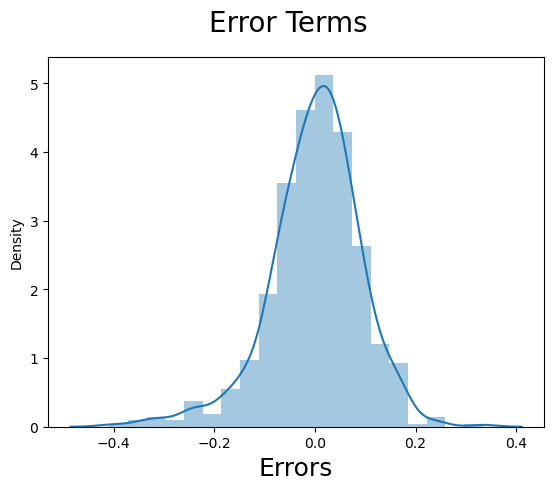

In [1623]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1624]:
# residual is centeretd around 0, thickness around 0.4 on left
# Errors are normally distribured here with mean 0. So everything seems to be fine

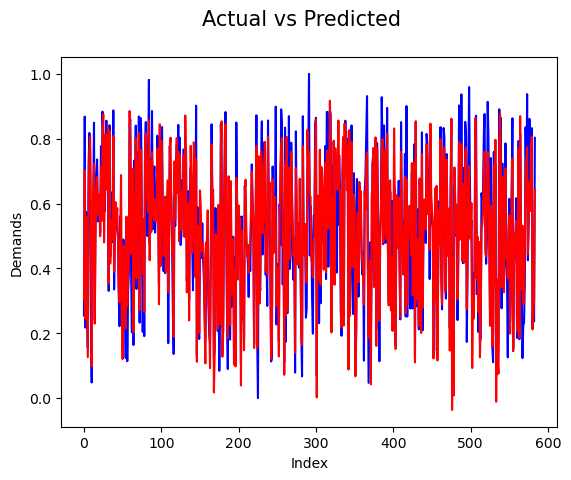

In [1625]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train_new),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Making Predictions
# Applying the scaling on the test sets

In [1626]:

num_vars = ['temp','atemp', 'hum', 'windspeed', 'Duration','cnt']

BikeRental_test[num_vars] = scaler.transform(BikeRental_test[num_vars])

# Dividing into X_test and y_test

In [1627]:
y_test = BikeRental_test.pop('cnt')
x_test = BikeRental_test

In [1628]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe 
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [1629]:
# Making predictions
y_pred = lm.predict(x_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

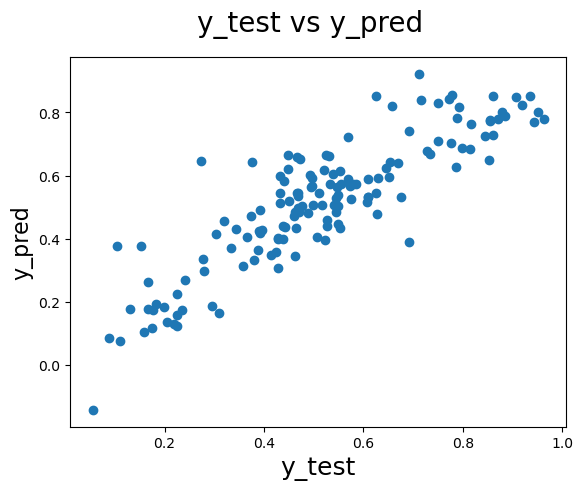

In [1630]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1631]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7544238208820537

In [ ]:
# Prediction is approximately near R2 83

In [ ]:
# Analysing the above model, the comapany should focus on the following features:
# Company should focus on expanding business during Summer.
# Company should focus on expanding business during September.
# Based on previous data it is expected to have a boom in number of users once situation comes back to normal,compared to 2019.
# There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes
# without having business impact or reshuffling the staff or other maintainance
# Hence when the situation comes back to normal, the company should come up with new offers during 
# Summer when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

In [ ]:
# Conclusion
# Significant variables to predict the demand for shared bikes

# months(January, November, December, July, September,)
# Year (2019)
# holiday
# temp
# hum
# windspeed
# Season
# Sunday
# weathersit( Light Snow, Mist + Cloudy)